# Estatistica I
 *Joana Andreia Machado Vale   
Maio 2020*

# **Os principais tipos de amostragem**

*ALEATÓRIA:*

In [5]:
import pandas as pd
import numpy as np

base = pd.read_csv('/content/drive/My Drive/dados/iris.csv')
base

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
base.shape

np.random.seed(2345)
amostra = np.random.choice(a = [0, 1], 
                           size = 150, 
                           replace = True,
                           p = [0.5, 0.5])

In [12]:
# TAMANHO DA AMOSTRA:
len(amostra)

150

In [9]:
len(amostra[amostra == 1])

80

In [10]:
len(amostra[amostra == 0])

70

*ESTRATIFICADA:*

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [15]:
# BASE DE DADOS IRIS:
iris = pd.read_csv('/content/drive/My Drive/dados/iris.csv')
iris['class'].value_counts()  # saber quantos tem em cada classes


X, _, y, _ = train_test_split(iris.iloc[:, 0:4], 
                              iris.iloc[:, 4],
                              test_size = 0.5, 
                              stratify = iris.iloc[:,4])
y.value_counts()

Iris-versicolor    25
Iris-setosa        25
Iris-virginica     25
Name: class, dtype: int64

In [16]:
# BASE DE DADOS INFERT:
infert = pd.read_csv('/content/drive/My Drive/dados/infert.csv')
infert['education'].value_counts()

X1, _, y1, _ = train_test_split(infert.iloc[:, 2:9],              # TABELA TODA  (Nº DE COLUNAS + 1))
                                infert.iloc[:, 1],                # COLUNA QUE PRETENDEMOS
                                test_size = 0.594,                # PARA DAR AS 100 NO X1
                                stratify = infert.iloc[:, 1])     
y1.value_counts()

6-11yrs    48
12+ yrs    47
0-5yrs      5
Name: education, dtype: int64

*SISTEMATICA:*

In [0]:
import numpy as np
import pandas as pd
from math import ceil

In [24]:
populacao = 150
amostra = 15
k = ceil(populacao / amostra)    # CEIL -> ARREDONDA PARA CIMA

r = np.random.randint(low = 1, high = k + 1, size = 1)   # ESCOLHE UM VALOR

acumulador = r[0]
sorteados = []
for i in range(amostra):
    sorteados.append(acumulador)
    acumulador += k

base = pd.read_csv('/content/drive/My Drive/dados/iris.csv')
base_final = base.loc[sorteados]
base_final

,sepal length,sepal width,petal length,petal width,class
6,4.6,3.4,1.4,0.3,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
26,5.0,3.4,1.6,0.4,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor
66,5.6,3.0,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor


# **Centralidade e varibilidade dos dados**

In [0]:
import numpy as np
from scipy import stats

jogadores = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000]

In [27]:
# Média
np.mean(jogadores)

181111.11111111112

In [28]:
# Mediana
np.median(jogadores)

40000.0

In [33]:
# Quartis
quartis = np.quantile(jogadores, [0, 0.25, 0.5, 0.75, 1])
quartis

array([ 12000.,  30000.,  40000., 250000., 800000.])

In [30]:
# Desvio-padrão
np.std(jogadores, ddof = 1)

255307.87514511007

In [32]:
# Resumo
stats.describe(jogadores)

DescribeResult(nobs=9, minmax=(12000, 800000), mean=181111.11111111112, variance=65182111111.11111, skewness=1.758635899846188, kurtosis=1.9572075427527729)

# **Distribuição Binomial**

In [0]:
from scipy.stats import binom

In [0]:
# Jogar uma moeda 5 vezes, qual a probabilidade de dar cara 3 vezes?
prob = binom.pmf(3, 5, 0.5)

In [40]:
# Passar por 4 sinais de 4 tempos, qual a probabilidade de pegar sinal verde
# nenhuma, 1, 2, 3 ou 4 vezes seguidas?
binom.pmf(0, 4, 0.25)

0.31640625000000006

In [41]:
binom.pmf(1, 4, 0.25)

0.4218750000000001

In [42]:
binom.pmf(2, 4, 0.25)

0.21093750000000006

In [43]:
binom.pmf(3, 4, 0.25)

0.046875000000000035

In [44]:
binom.pmf(4, 4, 0.25)

0.003906250000000001

In [45]:
# E se forem sinais de dois tempos?
binom.pmf(4, 4, 0.5)

0.0625

In [46]:
# Probabilidade acumulativa
binom.cdf(4, 4, 0.25)

1.0

In [47]:
# Concurso com 12 questões, qual a probabilidade de acertar 7 questões considerando
# que cada questão tem 4 alternativas?
binom.pmf(7, 12, 0.25) * 100

1.1471271514892574

In [48]:
binom.pmf(12, 12, 0.25) * 100  # se fosse acertar todas

5.960464477539072e-06

# **Distribuição Normal**

In [0]:
from scipy.stats import norm

In [50]:
# Conjunto de objetos em uma cesta, a média é 8 e o desvio padrão é 2
# Qual a probabilidade de tirar um objeto que peso é menor que 6 quilos?
norm.cdf(6, 8, 2)

0.15865525393145707

In [51]:
# Qual a probabilidade de tirar um objeto que o peso á maior que 6 quilos?
norm.sf(6, 8, 2)

0.8413447460685429

In [52]:
1 - norm.cdf(6, 8, 2) # ou esta forma

0.8413447460685429

In [55]:
# Qual a probabilidade de tirar um objeto que o peso é menor que 6 ou maior que 10 quilos?
norm.cdf(6, 8, 2) + norm.sf(10, 8, 2)

0.31731050786291415

In [54]:
# Qual a probabilidade de tirar um objeto que o peso é menor que 10 e maior que 8 quilos?
norm.cdf(10, 8, 2) - norm.cdf(8, 8, 2)

0.3413447460685429

*Teste a normalidade*

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

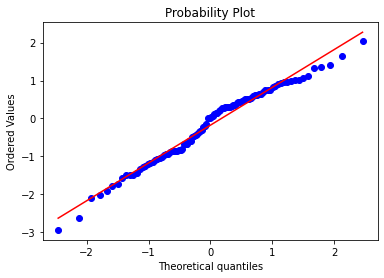

In [56]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

dados = norm.rvs(size = 100)
stats.probplot(dados, plot = plt)

In [58]:
# ou pelo teste de Shapiro-Wilk
stats.shapiro(dados)

(0.9785987734794617, 0.10332249850034714)

In [0]:
# COMO 0.103 > α = 0,05 -> Assim, podemos afirmar com nível de significância de 5% que a amostra provém de uma população normal.

# **Distribuição de T-Student**

In [0]:
from scipy.stats import t

In [60]:
# Média de salário dos cientistas de dados = 75,00 € por hora
# Amostra com 9 funcionários e desvio padrão = 10

# Qual a probabilidade de selecionar um cientista de dados e o salário 
# ser menor que 80 € por hora?
t.cdf(1.5, 8)

0.9139983540240443

In [62]:
# Qual a probabilidade do salário ser maior do que 80?
t.sf(1.5, 8) * 100

8.600164597595565

In [63]:
1 - t.cdf(1.5, 8)  # ou pelo contrário da função anterior

0.08600164597595572